In [3]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
len(words)

32033

In [5]:
for w in words[:1]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [4]:
import torch

In [8]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [5]:
chars=sorted(list(set(''.join(words))))

In [6]:
chars
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
stoi


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [11]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    N[stoi[ch1], stoi[ch2]] += 1

In [12]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [13]:
p=N[0].float()
p = p / p.sum() # probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [17]:
g = torch.Generator().manual_seed(2147483647)
sampled_tensor = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
sampled_tensor
itos[sampled_tensor.item()]

'c'

In [18]:
P = N.float()

In [19]:
P.shape

torch.Size([27, 27])

In [21]:
Z = P.sum(1, keepdim=True)# sum of each row
Z.shape, Z

(torch.Size([27, 1]),
 tensor([[32033.],
         [33885.],
         [ 2645.],
         [ 3532.],
         [ 5496.],
         [20423.],
         [  905.],
         [ 1927.],
         [ 7616.],
         [17701.],
         [ 2900.],
         [ 5040.],
         [13958.],
         [ 6642.],
         [18327.],
         [ 7934.],
         [ 1026.],
         [  272.],
         [12700.],
         [ 8106.],
         [ 5570.],
         [ 3135.],
         [ 2573.],
         [  929.],
         [  697.],
         [ 9776.],
         [ 2398.]]))

In [22]:
# how to divide [27, 27] by [27, 1]
# answer is broadcasting it is automatically done by torch rules.
P / Z

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [ ]:
g = torch.Generator().manual_seed(2147483647)
z = torch.rand(3, generator=g)
z = z / z.sum()
z

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(z, num_samples=20, generator=g, replacement=True)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

'e'

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [23]:
P = N.float()
P/=P.sum(1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)
for i in range(5):

  index = 0
  out = []
  while True:
    z = P[index]
    index = torch.multinomial(z, num_samples=1, generator=g, replacement=True).item()
    out.append(itos[index])
    if index == 0: break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [24]:
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    n += 1
    prob = P[stoi[ch1], stoi[ch2]]

    log_value = torch.log(prob)
    log_likelihood += log_value
    print(f'{ch1}{ch2} prob: {prob:.4f} log_lprob: {log_value:.4f}')

nll = -1 * log_likelihood
normalized_negative_log_likelihood_loss = nll/n
nll, normalized_negative_log_likelihood_loss

.a prob: 0.1377 log_lprob: -1.9829
an prob: 0.1605 log_lprob: -1.8296
nd prob: 0.0384 log_lprob: -3.2594
dr prob: 0.0771 log_lprob: -2.5620
re prob: 0.1336 log_lprob: -2.0127
ej prob: 0.0027 log_lprob: -5.9171
jq prob: 0.0000 log_lprob: -inf
q. prob: 0.1029 log_lprob: -2.2736


(tensor(inf), tensor(inf))

In [ ]:
# for unknown biagrams like andrejq  we need to add smoothing like instead of zeroes start with 1 in the count matrix

In [25]:
P = (1 + N).float()
P/=P.sum(1, keepdim=True)
log_likelihood = 0.0
n = 0
for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    n += 1
    prob = P[stoi[ch1], stoi[ch2]]

    log_value = torch.log(prob)
    log_likelihood += log_value
    print(f'{ch1}{ch2} prob: {prob:.4f} log_lprob: {log_value:.4f}')

nll = -1 * log_likelihood
normalized_negative_log_likelihood_loss = nll/n
nll, normalized_negative_log_likelihood_loss

.a prob: 0.1376 log_lprob: -1.9835
an prob: 0.1604 log_lprob: -1.8302
nd prob: 0.0384 log_lprob: -3.2594
dr prob: 0.0770 log_lprob: -2.5646
re prob: 0.1334 log_lprob: -2.0143
ej prob: 0.0027 log_lprob: -5.9004
jq prob: 0.0003 log_lprob: -7.9817
q. prob: 0.0970 log_lprob: -2.3331


(tensor(27.8672), tensor(3.4834))

In [ ]:
P = (1 + N).float()
P/=P.sum(1, keepdim=True)
log_likelihood = 0.0
n = 0
for w in words:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    n += 1
    prob = P[stoi[ch1], stoi[ch2]]

    log_value = torch.log(prob)
    log_likelihood += log_value
    # print(f'{ch1}{ch2} prob: {prob:.4f} log_lprob: {log_value:.4f}')

nll = -1 * log_likelihood
normalized_negative_log_likelihood_loss = nll/n
nll, normalized_negative_log_likelihood_loss

(tensor(559951.5625), tensor(2.4544))

In [26]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):

  index = 0
  out = []
  while True:
    z = P[index]
    index = torch.multinomial(z, num_samples=1, generator=g, replacement=True).item()
    out.append(itos[index])
    if index == 0: break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [40]:
# Neural network to predict the next character
xs = []
ys = []
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    xs.append(stoi[ch1])
    ys.append(stoi[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs = torch.nn.functional.one_hot(xs, 27).float()
xs, ys

(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 tensor([ 5, 13, 13,  1,  0]))

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xs)

NameError: name 'xs' is not defined

In [ ]:
?? torch.randn

In [42]:
# one hot encoding is done.
Weights = torch.randn((27, 27), requires_grad=True) # 27 neurons 27 weights.




 # this is nothing but dope way od sigmoid function and explains logic of softmax and cross entropy.

In [58]:
## NN architecture to approximate probabilities.


3.2706520557403564

In [35]:
probability[0].sum()

tensor(1.0000)

In [60]:
xs = []
ys = []
for w in words:
  chs = ['.'] + list(w) + ['.']

  for ch1, ch2 in zip(chs, chs[1:]):
    xs.append(stoi[ch1])
    ys.append(stoi[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs = torch.nn.functional.one_hot(xs, 27).float()
len(xs)

228146

In [74]:
epochs = 200
learning_rate = 50
Weights = torch.randn((27, 27), requires_grad=True) # 27 neurons 27 weights.

for i in range(epochs):

  exponentiated = (xs @ Weights).exp()
  probability = exponentiated / exponentiated.sum(1, keepdim=True)
  required_probs = probability[torch.arange(len(ys)), ys]

  loss = -required_probs.log().mean()
  Weights.grad = None

  loss.backward(), Weights.grad

  Weights.data += -learning_rate * Weights.grad
  print(loss.item())

3.809094190597534
3.456298351287842
3.220381259918213
3.0611155033111572
2.9459033012390137
2.8610291481018066
2.798457384109497
2.7517948150634766
2.7160935401916504
2.6879148483276367
2.6650359630584717
2.64603328704834
2.629976272583008
2.6162383556365967
2.604379177093506
2.594068765640259
2.585049867630005
2.5771141052246094
2.5700888633728027
2.563831329345703
2.558223247528076
2.5531668663024902
2.548581838607788
2.5444021224975586
2.5405735969543457
2.537051200866699
2.533796548843384
2.5307791233062744
2.5279717445373535
2.5253524780273438
2.522901773452759
2.5206024646759033
2.5184412002563477
2.5164055824279785
2.51448392868042
2.512666940689087
2.5109469890594482
2.509315252304077
2.5077662467956543
2.5062930583953857
2.5048911571502686
2.5035548210144043
2.502279758453369
2.5010623931884766
2.49989914894104
2.498785972595215
2.497720241546631
2.4966986179351807
2.4957191944122314
2.494779109954834
2.4938764572143555
2.493008613586426
2.492173910140991
2.491370677947998
2.4

In [73]:
# reproduce the same word using logits. not the bigramp probability table.
g = torch.Generator().manual_seed(2147483647)
logits = Weights.exp()
for i in range(5):

  index = 0
  out = []
  while True:
    z = logits[index]
    index = torch.multinomial(z, num_samples=1, generator=g, replacement=True).item()
    out.append(itos[index])
    if index == 0: break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.


In [77]:
# regularization via gradient = higher smoothing factor.
## this is LIT focus more in theory also on it. + 0.01*(Weights**2).mean()
epochs = 200
learning_rate = 50
regularization_learning_rate = 0.01
Weights = torch.randn((27, 27), requires_grad=True) # 27 neurons 27 weights.

for i in range(epochs):

  exponentiated = (xs @ Weights).exp()
  probability = exponentiated / exponentiated.sum(1, keepdim=True)
  required_probs = probability[torch.arange(len(ys)), ys]

  loss = -required_probs.log().mean() + regularization_learning_rate*(Weights**2).mean()
  Weights.grad = None

  loss.backward(), Weights.grad

  Weights.data += -learning_rate * Weights.grad
  print(loss.item())

g = torch.Generator().manual_seed(2147483647)
logits = Weights.exp()
for i in range(5):

  index = 0
  out = []
  while True:
    z = logits[index]
    index = torch.multinomial(z, num_samples=1, generator=g, replacement=True).item()
    out.append(itos[index])
    if index == 0: break
  print(''.join(out))

3.7648160457611084
3.3685529232025146
3.1420698165893555
3.004106044769287
2.9079911708831787
2.8382632732391357
2.785804510116577
2.7450850009918213
2.7127699851989746
2.686709403991699
2.665419101715088
2.647822141647339
2.633115530014038
2.620680570602417
2.6100358963012695
2.6008100509643555
2.5927202701568604
2.5855562686920166
2.5791611671447754
2.5734150409698486
2.568223714828491
2.5635130405426025
2.5592193603515625
2.5552921295166016
2.551687240600586
2.548367500305176
2.5453007221221924
2.542459487915039
2.539820432662964
2.5373620986938477
2.5350677967071533
2.532921314239502
2.5309085845947266
2.5290184020996094
2.5272390842437744
2.5255625247955322
2.523979425430298
2.5224831104278564
2.521066427230835
2.5197229385375977
2.5184483528137207
2.5172364711761475
2.5160839557647705
2.514986276626587
2.513939380645752
2.5129408836364746
2.511986494064331
2.5110747814178467
2.510201930999756
2.509366035461426
2.5085654258728027
2.5077967643737793
2.5070598125457764
2.50635170936

In [9]:
# Make more part 2.
# let's make it like a simple model where context window is length 3 that is given the previous 3 chars, what is the next possible word.


(torch.Size([228146, 3]), torch.Size([228146]))

In [10]:
Embeddings = torch.randn(27, 2) # each 27 character having a 2 dimensional embedding
Embeddings

tensor([[-0.5046, -0.0364],
        [ 2.3447, -0.3853],
        [ 0.6860,  0.8601],
        [-0.5950, -0.5118],
        [ 1.4613, -0.1271],
        [-0.7178, -1.0398],
        [-0.0320, -1.0760],
        [-0.6502,  0.9021],
        [ 1.2207,  0.8781],
        [ 1.0799,  1.1890],
        [ 0.1759,  0.7958],
        [-1.1200, -0.3223],
        [ 2.2279, -0.7509],
        [-1.5437, -0.6273],
        [-1.9147,  1.5900],
        [-0.7320, -0.2570],
        [-0.0307,  0.7959],
        [ 2.3191,  1.9082],
        [ 1.3028, -0.3242],
        [-0.9389,  1.3467],
        [ 1.0735, -0.5450],
        [ 1.0714,  0.1147],
        [ 1.2127,  0.4438],
        [-0.6811,  0.0421],
        [-1.7414,  0.3648],
        [ 1.1389,  0.5477],
        [-0.5639,  0.2027]])

In [88]:
Embeddings[5]

tensor([-0.5146, -2.2052])

In [92]:
torch.nn.functional.one_hot(torch.tensor(5), num_classes=27).float() @ Embeddings

tensor([-0.5146, -2.2052])

In [95]:
Embeddings[X].shape # magical is python, see Embeddings matrix just transposed itself
# and adopted it to fill X with embedding values across all 32 * 3 values.

torch.Size([32, 3, 2])

In [12]:
X[13, 2], Embeddings[X][13, 2]

(tensor(1), tensor([ 2.3447, -0.3853]))

In [105]:
image_url = "https://drive.google.com/file/d/1AZ8V7-LzEpi3FVjn6-LPuKWV8fihTb-b/view?usp=sharing"

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


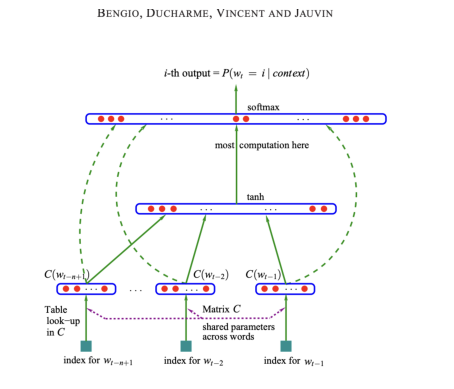

In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/drive/My Drive/model_architecture.png' # Replace with your actual path
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') # Turn off axis numbers
plt.show()

In [7]:
W1 = torch.randn(6, 100)
b1 = torch.randn(100)
inputs = Embeddings[X]
inputs.shape, W1.shape, b1.shape
# watch that inputs can't be multiplied to wait here since matrix multiplication is not possible with such a shape.
torch.cat((inputs[:, 0, :], inputs[:, 1, :], inputs[:, 2, :]), 1).shape, W1.shape, b1.shape
# then there is something known as unbind.
torch.cat(torch.unbind(inputs, 1), 1).shape, W1.shape, b1.shape
# then all of these above things ar euseless as they involve creating another copy of inputs and leads to memory waste better ways.input
inputs.storage() # physically all of these are stored as one dimensional vector and the view is just transforming the internal tensor properties.

inputs.view((32, 6)).shape, W1.shape, b1.shape

NameError: name 'Embeddings' is not defined

In [125]:
a = torch.randn((3, 4))
b = torch.randn(4)
a, b

(tensor([[ 2.5453,  1.9275,  0.7432, -0.2213],
         [ 0.1145, -1.8706, -1.0223, -0.2783],
         [-0.0100, -1.8251,  0.6750, -1.6123]]),
 tensor([ 0.2078, -0.3546, -0.8247, -0.5339]))

In [127]:
a + b

tensor([[ 2.7531,  1.5730, -0.0815, -0.7551],
        [ 0.3223, -2.2251, -1.8470, -0.8121],
        [ 0.1978, -2.1797, -0.1497, -2.1462]])

In [128]:
L1_inference = torch.tanh(inputs.view(-1, 6) @ W1 + b1) # tanh activation for layer 1.

In [130]:
L1_inference.shape

torch.Size([32, 100])

In [133]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
W2.shape, b2.shape

(torch.Size([100, 27]), torch.Size([27]))

In [134]:
L2_inference_logits = L1_inference @ W2 + b2
L2_inference_logits.shape

torch.Size([32, 27])

In [135]:
L2_inference_counts = L2_inference_logits.exp()

In [145]:
L2_inference_probs = L2_inference_counts / L2_inference_counts.sum(1, keepdim=True)
loss = -1*L2_inference_probs[torch.arange(len(Y)), Y].log().mean()
loss,

(tensor(17.8547),)

In [13]:
Y.shape
len(Y)

228146

In [14]:

num_chars

27

In [44]:
# unified preview.
num_chars = len(stoi)
context_window_length = 3;
X, Y = [], []
for w in words:
  context_window = [0] * context_window_length
  for ch in w + '.':
    index = stoi[ch]
    X.append(context_window)
    Y.append(index)
    context_window = context_window[1:] + [index]

X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, Y.shape

embedding_size = 2;
num_neurons = 100;
batch_size = 100;

Embeddings = torch.randn(num_chars, 2)
W1 = torch.randn(embedding_size * context_window_length, 100)
b1 = torch.randn(num_neurons)
W2 = torch.randn((num_neurons, num_chars))
b2 = torch.randn(num_chars)
parameters = [Embeddings, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)


3481

In [22]:
import matplotlib.pyplot as plt

In [29]:
gradient_descent_learning_rates = torch.linspace(-3, 0, 1000)
gradient_descent_learning_rates_exponentiated = 10 ** torch.linspace(-3, 0, 1000)
gradient_descent_learning_rates, gradient_descent_learning_rates_exponentiated

(tensor([-3.0000, -2.9970, -2.9940, -2.9910, -2.9880, -2.9850, -2.9820, -2.9790,
         -2.9760, -2.9730, -2.9700, -2.9670, -2.9640, -2.9610, -2.9580, -2.9550,
         -2.9520, -2.9489, -2.9459, -2.9429, -2.9399, -2.9369, -2.9339, -2.9309,
         -2.9279, -2.9249, -2.9219, -2.9189, -2.9159, -2.9129, -2.9099, -2.9069,
         -2.9039, -2.9009, -2.8979, -2.8949, -2.8919, -2.8889, -2.8859, -2.8829,
         -2.8799, -2.8769, -2.8739, -2.8709, -2.8679, -2.8649, -2.8619, -2.8589,
         -2.8559, -2.8529, -2.8498, -2.8468, -2.8438, -2.8408, -2.8378, -2.8348,
         -2.8318, -2.8288, -2.8258, -2.8228, -2.8198, -2.8168, -2.8138, -2.8108,
         -2.8078, -2.8048, -2.8018, -2.7988, -2.7958, -2.7928, -2.7898, -2.7868,
         -2.7838, -2.7808, -2.7778, -2.7748, -2.7718, -2.7688, -2.7658, -2.7628,
         -2.7598, -2.7568, -2.7538, -2.7508, -2.7477, -2.7447, -2.7417, -2.7387,
         -2.7357, -2.7327, -2.7297, -2.7267, -2.7237, -2.7207, -2.7177, -2.7147,
         -2.7117, -2.7087, -

In [8]:
def train_my_mlp(X, Y, epochs, lr, Embeddings, embedding_size, context_window_length, W1, b1, W2, b2):
  losses = []
  steps = []
  for i in range(epochs):

    # Training on full X is too slow and is non scalable. let's just train on a mini batch. this is known as stochastic batch gradient descent.

    mini_batch = torch.randint(X.shape[0], (batch_size,))
    # print(mini_batch)
    # print(X[mini_batch])

    inputs = Embeddings[X[mini_batch]]
    outputs = Y[mini_batch]
    L1_inference = torch.tanh(inputs.view(-1, embedding_size * context_window_length) @ W1 + b1) # tanh activation for layer 1.
    L2_inference_logits = L1_inference @ W2 + b2

    # L2_inference_counts = L2_inference_logits.exp()
    # L2_inference_probs = L2_inference_counts / L2_inference_counts.sum(1, keepdim=True)
    # loss = -1*L2_inference_probs[torch.arange(len(Y)), Y].log().mean()

    loss = torch.nn.functional.cross_entropy(L2_inference_logits, outputs)


    for p in parameters:
      p.grad = None

    loss.backward()
    # lr1 = gradient_descent_learning_rates_exponentiated[i]

    for p in parameters:
      p.data += -1*lr * p.grad

    # losses.append(loss.item())
    losses.append(loss.item())
    steps.append(i)
  return (losses, steps)

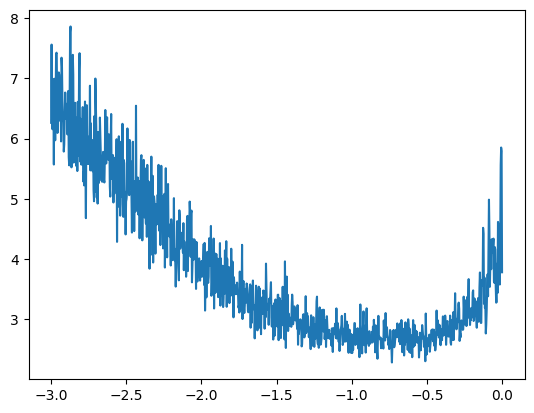

In [34]:
plt.plot(gradient_descent_learning_rates, losses)

In [ ]:
# train set optimizes weights,
# dev or validation set optimiizes hyper params (like learning rate, epochs, number of params, batch size , weights size, embedding size etc.)
# test set

In [ ]:
# we have to beat the loss of Andrej that is 2.17

In [ ]:
# sampling has to be done.

In [ ]:
epochs = 100000
constant_learning_rate = 0.1

In [39]:
# train set 80%, dev or validation set 10%, test set 10% split needed. to not overfit.

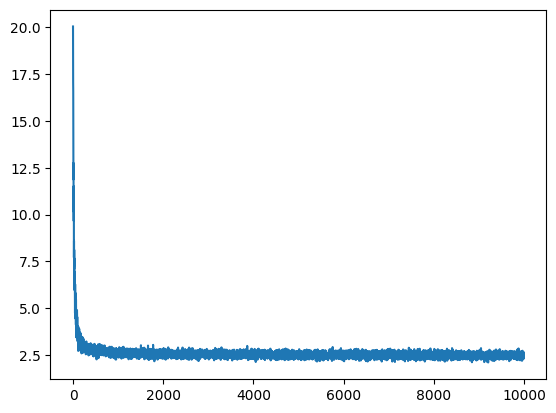

In [46]:
(losses, steps) = train_my_mlp(X, Y, epochs=10000, lr = 0.1)
plt.plot(steps, losses),

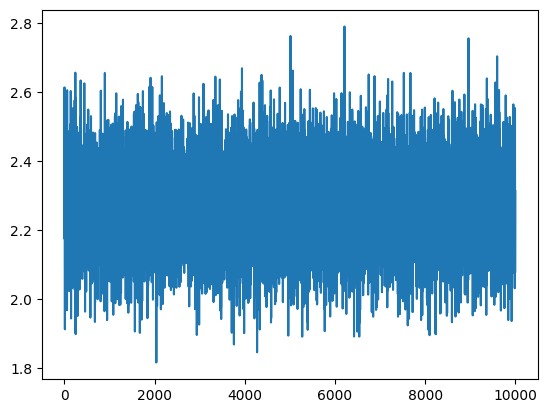

In [15]:
num_chars = len(stoi)
def build_dataset(words):
  num_chars = len(stoi)
  context_window_length = 3;
  X, Y = [], []
  for w in words:
    context_window = [0] * context_window_length
    for ch in w + '.':
      index = stoi[ch]
      X.append(context_window)
      Y.append(index)
      context_window = context_window[1:] + [index]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return (X, Y)

def train_test_valid_split(words, train_size, valid_size):
  b1 = int(train_size * len(words))
  b2 = int((train_size + valid_size) * len(words))

  (X_train, Y_train) = build_dataset(words[:b1])
  (X_val, Y_val) = build_dataset(words[b1:b2])
  (X_test, Y_test) = build_dataset(words[b2:])

  return (X_train, X_val, X_test, Y_train, Y_val, Y_test)


def give_me_weights(num_neurons, embedding_size, context_window_length):
    Embeddings = torch.randn(num_chars, embedding_size)
    W1 = torch.randn(embedding_size * context_window_length, num_neurons)
    b1 = torch.randn(num_neurons)
    W2 = torch.randn((num_neurons, num_chars))
    b2 = torch.randn(num_chars)
    parameters = [Embeddings, W1, b1, W2, b2]
    for p in parameters:
      p.requires_grad = True

    return (Embeddings, W1, b1, W2, b2)

    print(sum(p.nelement() for p in parameters))

In [16]:
import random
random.seed(42)
random.shuffle(words)

In [17]:
(X_train, X_val, X_test, Y_train, Y_val, Y_test) = train_test_valid_split(words, 0.8, 0.1)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


(torch.Size([182580, 3]),
 torch.Size([182580]),
 torch.Size([22767, 3]),
 torch.Size([22767]),
 torch.Size([22799, 3]),
 torch.Size([22799]))

In [18]:
def train_my_mlp(X, Y, epochs, lr, batch_size, Embeddings, embedding_size, context_window_length, W1, b1, W2, b2):
  losses = []
  steps = []
  parameters = [Embeddings, W1, b1, W2, b2]

  for i in range(epochs):

    # Training on full X is too slow and is non scalable. let's just train on a mini batch. this is known as stochastic batch gradient descent.

    mini_batch = torch.randint(X.shape[0], (batch_size,))
    # print(mini_batch)
    # print(X[mini_batch])

    inputs = Embeddings[X[mini_batch]]
    outputs = Y[mini_batch]
    L1_inference = torch.tanh(inputs.view(-1, embedding_size * context_window_length) @ W1 + b1) # tanh activation for layer 1.
    L2_inference_logits = L1_inference @ W2 + b2

    # L2_inference_counts = L2_inference_logits.exp()
    # L2_inference_probs = L2_inference_counts / L2_inference_counts.sum(1, keepdim=True)
    # loss = -1*L2_inference_probs[torch.arange(len(Y)), Y].log().mean()

    loss = torch.nn.functional.cross_entropy(L2_inference_logits, outputs)


    for p in parameters:
      p.grad = None

    loss.backward()
    # lr1 = gradient_descent_learning_rates_exponentiated[i]

    for p in parameters:
      p.data += -1*lr * p.grad

    # losses.append(loss.item())
    losses.append(loss.item())
    steps.append(i)
  return (losses, steps)

In [19]:
@torch.no_grad()
def validate_my_mlp(X, Y, Embeddings, embedding_size, context_window_length, W1, b1, W2, b2):

  inputs = Embeddings[X]
  outputs = Y
  L1_inference = torch.tanh(inputs.view(-1, embedding_size * context_window_length) @ W1 + b1) # tanh activation for layer 1.
  L2_inference_logits = L1_inference @ W2 + b2
  loss = torch.nn.functional.cross_entropy(L2_inference_logits, outputs)

  return loss.item()

In [23]:
(Embeddings, W1, b1, W2, b2) = give_me_weights(200, 20, 3)
Embeddings.shape, W1.shape, b1.shape, W2.shape, b2.shape

(torch.Size([27, 20]),
 torch.Size([60, 200]),
 torch.Size([200]),
 torch.Size([200, 27]),
 torch.Size([27]))

([<matplotlib.lines.Line2D at 0x7b8b60acade0>], 1.9201081991195679)

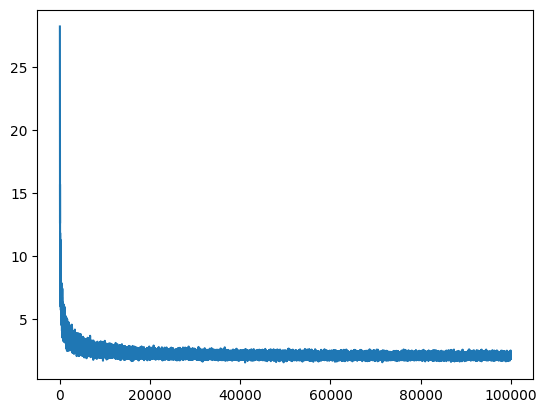

In [24]:
(losses, steps) = train_my_mlp(X_train, Y_train, epochs=100000, lr=0.1, batch_size= 100, Embeddings=Embeddings,
                               embedding_size = 20, context_window_length = 3, W1=W1, b1=b1, W2=W2, b2=b2)
plt.plot(steps, losses), losses[-1]

In [25]:
validate_my_mlp(X_val, Y_val, Embeddings=Embeddings, embedding_size = 20, context_window_length = 3, W1=W1, b1=b1, W2=W2, b2=b2)

2.184500217437744

([<matplotlib.lines.Line2D at 0x7b8b60223b90>], 1.976056694984436)

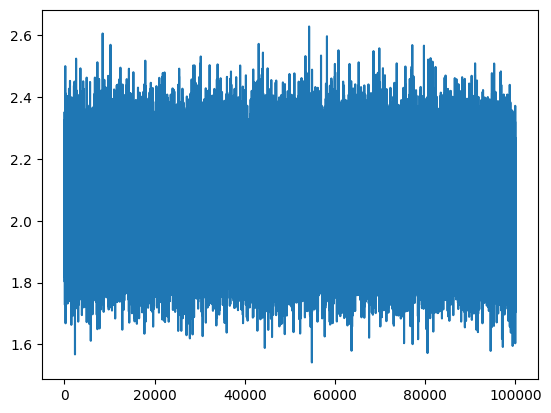

In [26]:
(losses, steps) = train_my_mlp(X_train, Y_train, epochs=100000, lr=0.01, batch_size= 100, Embeddings=Embeddings,
                               embedding_size = 20, context_window_length = 3, W1=W1, b1=b1, W2=W2, b2=b2)
plt.plot(steps, losses), losses[-1]

In [ ]:
# Challenge is to bring this validation loss below 2.1
# let's increase embedding size.

In [27]:
validate_my_mlp(X_val, Y_val, Embeddings=Embeddings, embedding_size = 20, context_window_length = 3, W1=W1, b1=b1, W2=W2, b2=b2)

2.136308431625366

In [28]:
validate_my_mlp(X_test, Y_test, Embeddings=Embeddings, embedding_size = 20, context_window_length = 3, W1=W1, b1=b1, W2=W2, b2=b2)

2.1423728466033936

In [36]:
# sampling the new names. aka inference from the model.
g = torch.Generator().manual_seed(2147483647 + 10)
embedding_size = 20
context_window_length = 3

for _ in range(20):
  word = ""
  context_window = [0] * context_window_length # start with all ...
  while True:
    embedding_input = Embeddings[torch.tensor([context_window])]
    L1_inference = torch.tanh(embedding_input.view(-1, embedding_size * context_window_length) @ W1 + b1) # tanh activation for layer 1.
    L2_inference_logits = L1_inference @ W2 + b2
    probability = torch.nn.functional.softmax(L2_inference_logits, dim = 1) # exponentiate and divide by exponentiation sum

    choosen_index = torch.multinomial(probability, num_samples=1, replacement=True, generator=g)
    context_window = context_window[1:] + [choosen_index]
    if choosen_index == 0:
      break
    word = word + (itos[choosen_index.item()])


  print(word)

carmah
ambrie
khi
miliatetyn
kanden
jazhnin
delynn
jareen
nellara
chaiha
kaleigh
ham
join
quintis
lilea
jadis
wavero
dearixton
jenni
sabee
